# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [98]:
import numpy as np
import pandas as pd
# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [62]:
# Code here
filtered = df_titanic[df_titanic["class"].isin(["1st", "2nd", "3rd"])]
passengers = pd.crosstab(filtered["class"], filtered["embarked"])
passengers

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [90]:
# Class given where they embarked
given_embarked = filtered.groupby("embarked")["class"].value_counts(normalize=True)
given_embarked

embarked  class
B         2nd      0.666667
          1st      0.333333
C         1st      0.527675
          3rd      0.376384
          2nd      0.095941
Q         3rd      0.918699
          2nd      0.056911
          1st      0.024390
S         3rd      0.540481
          2nd      0.268053
          1st      0.191466
Name: proportion, dtype: float64

In [87]:
# Where they embarked given class
filtered.groupby("class")["embarked"].value_counts(normalize=True)

class  embarked
1st    S           0.540123
       C           0.441358
       B           0.009259
       Q           0.009259
2nd    S           0.862676
       C           0.091549
       Q           0.024648
       B           0.021127
3rd    S           0.696756
       Q           0.159379
       C           0.143865
Name: proportion, dtype: float64

The proportion of 3rd class passengers at Southampton is 54%
The proportion  of Southamption passengers in 3rd class is 70%

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

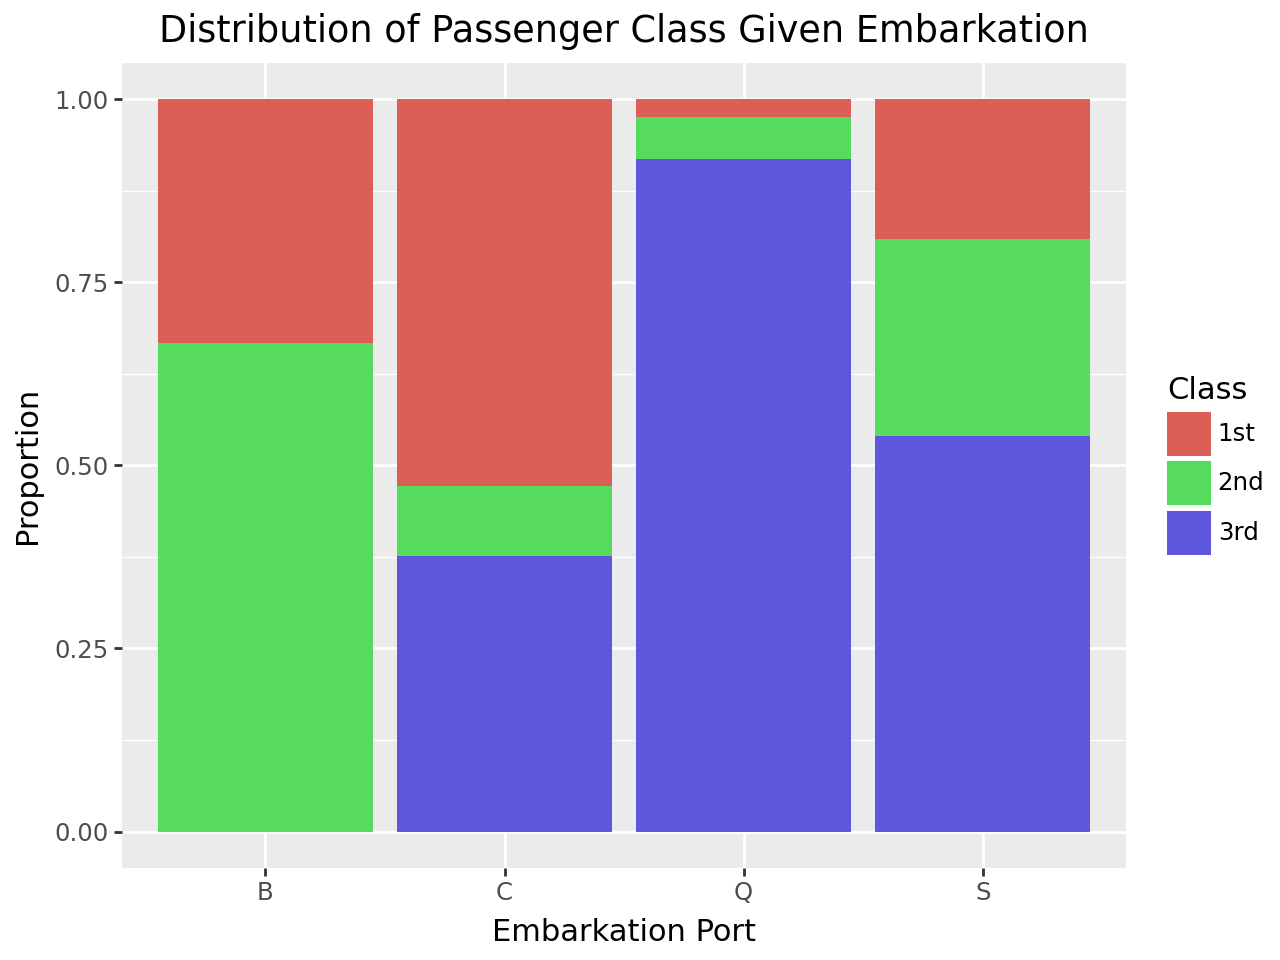

In [97]:
from plotnine import *

plot_data = given_embarked.reset_index()


(
    ggplot(plot_data, aes(x="embarked", y="proportion", fill="class"))
    + geom_bar(stat="identity", position="stack")
    + labs(
        title="Distribution of Passenger Class Given Embarkation",
        x="Embarkation Port",
        y="Proportion",
        fill="Class"
    )
    + theme(axis_text_x=element_text(rotation=0, ha="center"))
)

